In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',**{'family':'SimHei'})

In [5]:
df = pd.read_csv('books.csv')
df.head(3)

,ID,title,author_list,author,press,org_name,translator,pub_date,pub_year,pages_num,pages,pricing,price,currency,binding,series,ISBN,score,comment_num
0,1000019,政治无意识,弗雷德里克.詹姆逊,弗雷德里克.詹姆逊,中国社会科学出版社,NaN,王逢振/陈永国,1999-8,1999.0,297.0,297.0,35.00元,35.0,CNY,平装,知识分子图书馆,9787500425564,7.5,107
1,1000034,生死遗言,伊能静,伊能静,现代出版社,NaN,NaN,2002-10,2002.0,203.0,203.0,18.00元,18.0,CNY,平装,NaN,9787800288494,7.4,2377
2,1000041,游泳技巧图解,高桥雄介/吉村丰,高桥雄介,北京体育大学出版社,NaN,边静/等,2001-10-1,2001.0,223.0,223.0,20.00元,20.0,CNY,平装(无盘),NaN,9787810514156,8.4,42


In [6]:
len(df)

56768

In [7]:
df = df.drop(columns=['ID','author_list','org_name','translator','pub_year','pages_num','pricing','currency','binding','series'])

In [9]:
df.head(5)

,title,author,press,pub_date,pages,price,ISBN,score,comment_num
0,政治无意识,弗雷德里克.詹姆逊,中国社会科学出版社,1999-8,297.0,35.0,9787500425564,7.5,107
1,生死遗言,伊能静,现代出版社,2002-10,203.0,18.0,9787800288494,7.4,2377
2,游泳技巧图解,高桥雄介,北京体育大学出版社,2001-10-1,223.0,20.0,9787810514156,8.4,42
3,炒股必知必读,刘超,当代世界出版社,2000-01,NaN,20.0,9787801154194,0.0,0
4,公关圣经,菲利普.莱斯礼,汕头大学出版社,2004-03,957.0,98.0,9787810367004,7.7,44


In [10]:
df.columns = ['书名','作者','出版社','出版时间','页数','价格','ISBN','评分','评论数量']

In [11]:
df.head(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
0,政治无意识,弗雷德里克.詹姆逊,中国社会科学出版社,1999-8,297.0,35.0,9787500425564,7.5,107
1,生死遗言,伊能静,现代出版社,2002-10,203.0,18.0,9787800288494,7.4,2377
2,游泳技巧图解,高桥雄介,北京体育大学出版社,2001-10-1,223.0,20.0,9787810514156,8.4,42
3,炒股必知必读,刘超,当代世界出版社,2000-01,NaN,20.0,9787801154194,0.0,0
4,公关圣经,菲利普.莱斯礼,汕头大学出版社,2004-03,957.0,98.0,9787810367004,7.7,44


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56768 entries, 0 to 56767
Data columns (total 9 columns):
书名      56768 non-null object
作者      55835 non-null object
出版社     54621 non-null object
出版时间    55837 non-null object
页数      53564 non-null float64
价格      56768 non-null float64
ISBN    56747 non-null object
评分      56768 non-null float64
评论数量    56768 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.9+ MB


In [13]:
df.dtypes

书名       object
作者       object
出版社      object
出版时间     object
页数      float64
价格      float64
ISBN     object
评分      float64
评论数量      int64
dtype: object

In [14]:
df['书名'].isnull().sum()

0

In [15]:
df['作者'].isnull().sum()

933

In [16]:
df[df['作者'].isnull()].head(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
48,論語譯註,NaN,中华书局,1980,316.0,22.0,9787101003345,9.0,2300
283,亚·奥斯特洛夫斯基 契诃夫戏剧选,NaN,人民文学出版社,1998-2,400.0,25.6,9787020024742,9.0,78
510,永久记忆版世界文学名著文库,NaN,中国致公出版社,2003-5,16.0,18.5,9787801791535,7.8,15
646,中国古代科技成就,NaN,中国青年出版社,1978-03,738.0,26.6,9787500615644,7.0,14
768,杰克与豆蔓和其他世界经典童话寓言故事,NaN,民族出版社,2001-09,120.0,26.8,9787105046041,0.0,0


In [17]:
df.loc[df['作者'].isnull(),'作者']  = '无'
df.sample(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
9999,中国古代史读本,陈苏镇,北京大学出版社,2006-1-1,989.0,70.00,9787301091043,9.1,45
46293,The Wes Anderson Collection,Matt Zoller Seitz,Abrams,2015-1,256.0,24.92,9781419715716,9.6,80
37803,万物静默如谜,维斯瓦娃·辛波斯卡,浦睿文化·湖南文艺出版社,2012-8,201.0,26.00,9787540457228,8.6,11028
56489,自恋时代,简·M.腾格,江西人民出版社,2017-9,456.0,68.00,9787210095187,7.3,183
2086,外国古建筑二十讲,陈志华,生活·读书·新知三联书店,2002-1,348.0,69.00,9787108016331,8.5,1425


In [18]:
df['作者'].isnull().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56768 entries, 0 to 56767
Data columns (total 9 columns):
书名      56768 non-null object
作者      56768 non-null object
出版社     54621 non-null object
出版时间    55837 non-null object
页数      53564 non-null float64
价格      56768 non-null float64
ISBN    56747 non-null object
评分      56768 non-null float64
评论数量    56768 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.9+ MB


In [20]:
df['出版社'].isnull().sum()

2147

In [22]:
df = df.drop(df[df['出版社'].isnull()].index)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54621 entries, 0 to 56767
Data columns (total 9 columns):
书名      54621 non-null object
作者      54621 non-null object
出版社     54621 non-null object
出版时间    53984 non-null object
页数      51624 non-null float64
价格      54621 non-null float64
ISBN    54601 non-null object
评分      54621 non-null float64
评论数量    54621 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.2+ MB


In [24]:
df.head()

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
0,政治无意识,弗雷德里克.詹姆逊,中国社会科学出版社,1999-8,297.0,35.0,9787500425564,7.5,107
1,生死遗言,伊能静,现代出版社,2002-10,203.0,18.0,9787800288494,7.4,2377
2,游泳技巧图解,高桥雄介,北京体育大学出版社,2001-10-1,223.0,20.0,9787810514156,8.4,42
3,炒股必知必读,刘超,当代世界出版社,2000-01,NaN,20.0,9787801154194,0.0,0
4,公关圣经,菲利普.莱斯礼,汕头大学出版社,2004-03,957.0,98.0,9787810367004,7.7,44


In [32]:
import re 

def year(s):
    res = re.findall('\d{4}',str(s))
    if res:
        return res[0]
    else:
        return ' '

df['年份'] = df['出版时间'].apply(year)

In [35]:
df.sample(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,年份
30551,家在云之南,熊景明,人民文学出版社,2010-8,275.0,27.00,9787020079209,8.1,160,2010
24194,就算天空再深,林夕,亮光文化,2009,352.0,88.00,9789881791849,7.7,411,2009
44943,鱼羊野史·第2卷,高晓松,湖南文艺出版社,2014-8,305.0,39.80,9787540468361,7.4,2880,2014
36064,鲁米诗选,无,人民文学出版社,1958-2,60.0,0.22,9787800388613,7.8,61,1958
35584,我们为什么离正义越来越远,熊逸,湖南文艺出版社,2012-1,352.0,32.80,9787540452117,8.6,393,2012


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54621 entries, 0 to 56767
Data columns (total 10 columns):
书名      54621 non-null object
作者      54621 non-null object
出版社     54621 non-null object
出版时间    53984 non-null object
页数      51624 non-null float64
价格      54621 non-null float64
ISBN    54601 non-null object
评分      54621 non-null float64
评论数量    54621 non-null int64
年份      54621 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 4.6+ MB


In [36]:
import re

def price(s):
    res = re.findall('\d+[\.]+\d',str(s))
    if res:
        return res[0]
    else:
        return 0.0
    
df['清洗后价格'] = df['价格'].apply(price).astype(float)

In [39]:
df.sample(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,年份,清洗后价格
16989,鲁本斯素描解析,庞茂琨,重庆,2007-6,59.0,39.8,9787536686007,8.3,46,2007,39.8
26812,熱病,Zzz左右,龍馬,2009-07-31,16.0,0.0,9789866685972,7.8,511,2009,0.0
48632,正义的可能,周濂,中国文史出版社,2015-8-31,296.0,42.0,9787503465918,7.7,495,2015,42.0
4513,经济数学方法与模型,弗恩特,上海财经大学出版社,2003-1,781.0,88.0,9787810498890,8.5,35,2003,88.0
50894,廣告懶人包,Rudi Leung,白卷出版社,2016-3,200.0,98.0,9789881435057,0.0,0,2016,98.0


In [40]:
df = df.drop(df[df['评分'] == 0].index)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49819 entries, 0 to 56767
Data columns (total 11 columns):
书名       49819 non-null object
作者       49819 non-null object
出版社      49819 non-null object
出版时间     49282 non-null object
页数       47287 non-null float64
价格       49819 non-null float64
ISBN     49801 non-null object
评分       49819 non-null float64
评论数量     49819 non-null int64
年份       49819 non-null object
清洗后价格    49819 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.6+ MB


In [43]:
df.sample(5)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,年份,清洗后价格
26682,借东西的小人漂流记,玛丽·诺顿,译林出版社,2009-10,188.0,16.0,9787544708838,8.4,140,2009,16.0
47618,花园长谈,叶丹,秀威资讯科技,2015-6,111.0,180.0,9789864450121,9.2,27,2015,180.0
15022,城市中国,王志纲,人民出版,2007-3,269.0,40.0,9787010059976,6.9,45,2007,40.0
27826,失恋33天,鲍鲸鲸,中信出版社,2010-1,192.0,25.0,9787508618081,8.1,34398,2010,25.0
33114,杜甫,洪业,上海古籍出版社,2011-9,441.0,68.0,9787532559206,8.9,137,2011,68.0


In [44]:
df.describe()

,页数,价格,评分,评论数量,清洗后价格
count,47287.000000,49819.000000,49819.000000,49819.000000,49819.000000
mean,340.206864,81.670447,8.063090,913.803067,81.668424
std,558.371354,327.076380,0.824549,5318.149841,327.075354
min,0.000000,0.000000,2.000000,10.000000,0.000000
25%,206.000000,24.950000,7.500000,44.000000,24.900000
50%,273.000000,35.000000,8.100000,121.000000,35.000000
75%,372.000000,56.000000,8.700000,406.000000,56.000000
max,32767.000000,9999.990000,10.000000,324920.000000,9999.900000


In [51]:
df2 = df.groupby(['年份'])['书名'].count()
df2

年份
         537
0001       1
1882       1
1899       2
1900      54
1905       2
1920       1
1929       1
1930       1
1936       1
1937       2
1939       1
1943       1
1947       1
1949       1
1950       1
1951       1
1952       2
1953       2
1954       4
1955       4
1956      17
1957      18
1958      20
1959      27
1960      14
1961      10
1962      22
1963      20
1964       6
        ... 
1991     192
1992     182
1993     167
1994     220
1995     208
1996     351
1997     422
1998     606
1999     609
2000     754
2001     835
2002    1052
2003    1461
2004    1802
2005    2244
2006    2556
2007    2892
2008    2899
2009    3099
2010    3278
2011    3192
2012    3072
2013    3249
2014    3091
2015    3069
2016    3432
2017    2531
2018      44
2019       1
7150       1
Name: 书名, Length: 85, dtype: int64

In [52]:
df2 = df2[10:-2]
df2

年份
1937       2
1939       1
1943       1
1947       1
1949       1
1950       1
1951       1
1952       2
1953       2
1954       4
1955       4
1956      17
1957      18
1958      20
1959      27
1960      14
1961      10
1962      22
1963      20
1964       6
1965       7
1966       6
1967       1
1969       3
1970      41
1971       4
1972       6
1973      23
1974      14
1975      12
        ... 
1989     125
1990     130
1991     192
1992     182
1993     167
1994     220
1995     208
1996     351
1997     422
1998     606
1999     609
2000     754
2001     835
2002    1052
2003    1461
2004    1802
2005    2244
2006    2556
2007    2892
2008    2899
2009    3099
2010    3278
2011    3192
2012    3072
2013    3249
2014    3091
2015    3069
2016    3432
2017    2531
2018      44
Name: 书名, Length: 73, dtype: int64

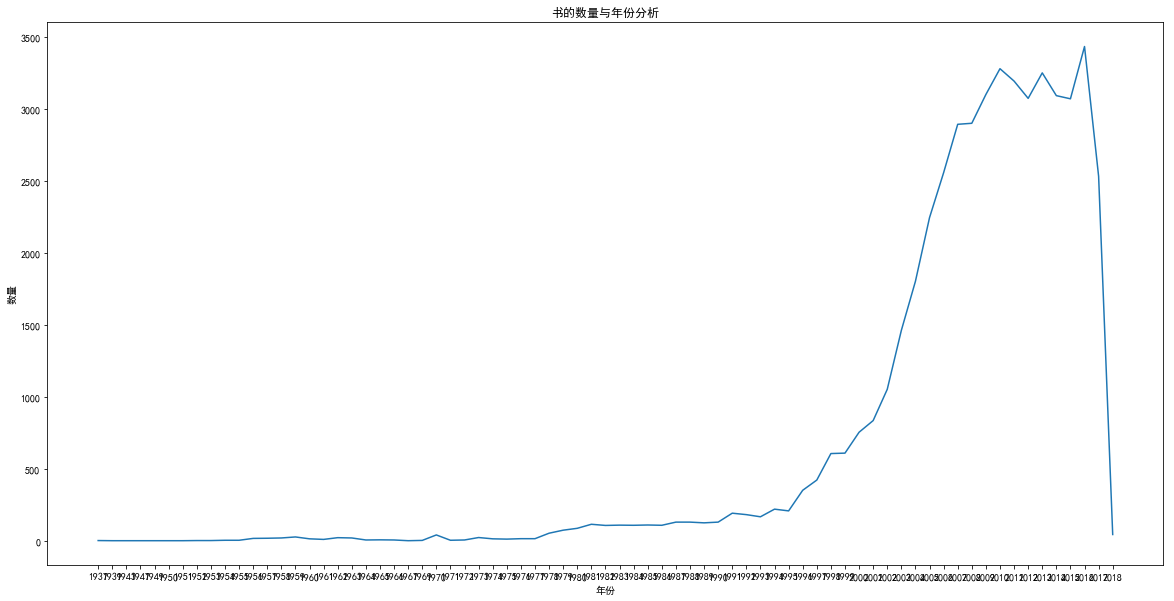

In [53]:
plt.figure(figsize=(20,10))
plt.plot(df2.index,df2.values)
plt.xlabel("年份")
plt.ylabel("数量")
plt.title("书的数量与年份分析")
plt.show()

In [56]:
df3 = df.groupby(['年份'])['评分'].mean()
df3  = df3[2:-1]
df3

年份
1882    9.200000
1899    7.500000
1900    8.225926
1905    8.650000
1920    8.800000
1929    6.000000
1930    9.100000
1936    9.300000
1937    8.350000
1939    8.700000
1943    7.700000
1947    8.900000
1949    9.200000
1950    8.900000
1951    9.400000
1952    9.350000
1953    8.150000
1954    8.900000
1955    8.725000
1956    8.517647
1957    8.755556
1958    8.510000
1959    8.448148
1960    8.664286
1961    8.590000
1962    8.690909
1963    8.750000
1964    8.783333
1965    8.814286
1966    8.816667
          ...   
1990    8.491538
1991    8.481771
1992    8.367582
1993    8.346108
1994    8.487273
1995    8.336058
1996    8.231624
1997    8.433412
1998    8.306271
1999    8.334647
2000    8.283422
2001    8.292216
2002    8.259696
2003    8.201232
2004    8.162597
2005    8.133021
2006    8.116745
2007    8.052178
2008    8.054122
2009    8.093675
2010    8.043502
2011    7.977538
2012    7.958529
2013    7.927701
2014    7.882918
2015    7.888954
2016    7.921008
2017    7.9

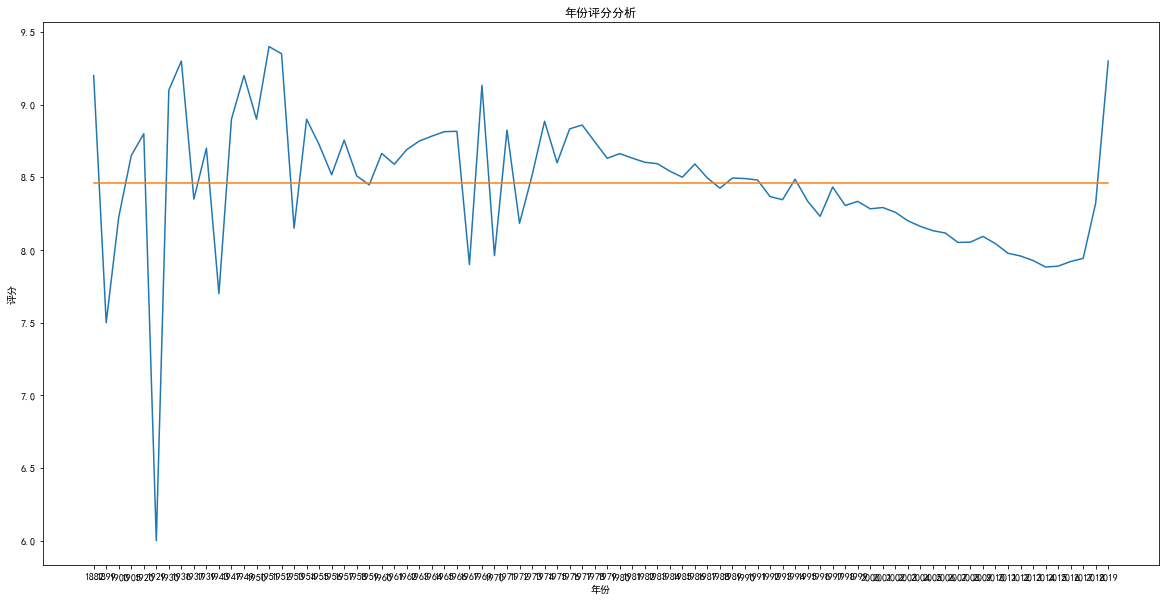

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df3.index,df3.values,[df3.values.mean() for z in range(len(df3.index))])
plt.xlabel("年份")
plt.ylabel("评分")
plt.title("年份评分分析")
plt.show()

In [61]:
df4 = df.groupby(['清洗后价格'])['书名'].count()
df4

清洗后价格
0.0       1366
0.1          8
0.2         23
0.3         40
0.4         45
0.5         36
0.6         39
0.7         36
0.8         38
0.9         33
1.0         27
1.1         35
1.2         32
1.3         33
1.4         19
1.5         25
1.6         19
1.7         15
1.8         23
1.9         24
2.0         26
2.1         17
2.2         15
2.3         19
2.4         18
2.5         24
2.6         17
2.7         10
2.8         16
2.9         18
          ... 
3990.0       4
4000.0       3
4104.0       1
4200.0       1
4500.0       1
4515.0       2
4680.0       1
4725.0       1
4800.0       2
4980.0       1
4990.0       1
5000.0       1
5250.0       2
5500.0       1
5680.0       1
5700.0       1
5775.0       1
5800.0       1
6400.0       1
6800.0       1
6980.0       1
7000.0       1
7425.0       1
7500.0       2
7980.0       1
8800.0       2
9000.0       1
9240.0       1
9800.0       1
9999.9      25
Name: 书名, Length: 1170, dtype: int64

In [62]:
df4 = df4[2:]
df4 

清洗后价格
2.0       26
2.1       17
2.2       15
2.3       19
2.4       18
2.5       24
2.6       17
2.7       10
2.8       16
2.9       18
3.0       16
3.1        9
3.2       11
3.3       11
3.4        8
3.5       17
3.6       11
3.7        5
3.8        9
3.9       26
4.0       18
4.1       11
4.2       13
4.3        7
4.4        8
4.5       14
4.6       10
4.7        7
4.8       12
4.9       22
          ..
3990.0     4
4000.0     3
4104.0     1
4200.0     1
4500.0     1
4515.0     2
4680.0     1
4725.0     1
4800.0     2
4980.0     1
4990.0     1
5000.0     1
5250.0     2
5500.0     1
5680.0     1
5700.0     1
5775.0     1
5800.0     1
6400.0     1
6800.0     1
6980.0     1
7000.0     1
7425.0     1
7500.0     2
7980.0     1
8800.0     2
9000.0     1
9240.0     1
9800.0     1
9999.9    25
Name: 书名, Length: 1150, dtype: int64

In [63]:
X = ['10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-1000','1000-5000','5000-10000f']

In [65]:
Y = []
for i in range(10):
    Y.append(df4[(df4.index > 10*i) & (df4.index <= 10*i + 10)].sum())
        
Y.append(df4[(df4.index > 100) & (df4.index <= 1000)].sum())
        
Y.append(df4[(df4.index > 1000) & (df4.index <= 5000)].sum())
                 
Y.append(df4[(df4.index > 5000) & (df4.index <= 10000)].sum())

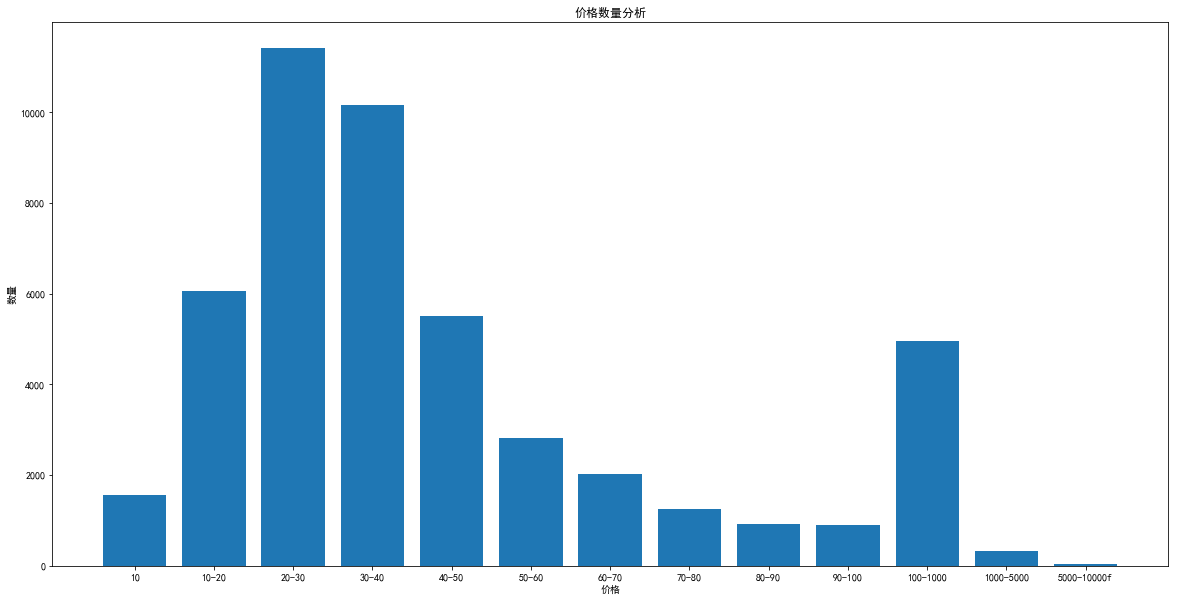

In [67]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(X)),X)
plt.bar(range(len(X)),Y)
plt.xlabel("价格")
plt.ylabel("数量")
plt.title("价格数量分析")
plt.show()

In [71]:
df5 = df.groupby(['出版社'])['书名'].count()

In [72]:
df5 = df5.sort_values(ascending=False)
df5 = df5[:20]
df5

出版社
中信出版社           1332
人民文学出版社         1056
人民邮电出版社         1020
上海译文出版社          990
机械工业出版社          859
广西师范大学出版社        859
生活·读书·新知三联书店     845
新星出版社            822
商务印书馆            777
中华书局             752
北京大学出版社          738
上海人民出版社          706
电子工业出版社          704
译林出版社            659
中国人民大学出版社        588
北京联合出版公司         536
长江文艺出版社          532
江苏文艺出版社          518
南海出版公司           497
湖南文艺出版社          462
Name: 书名, dtype: int64

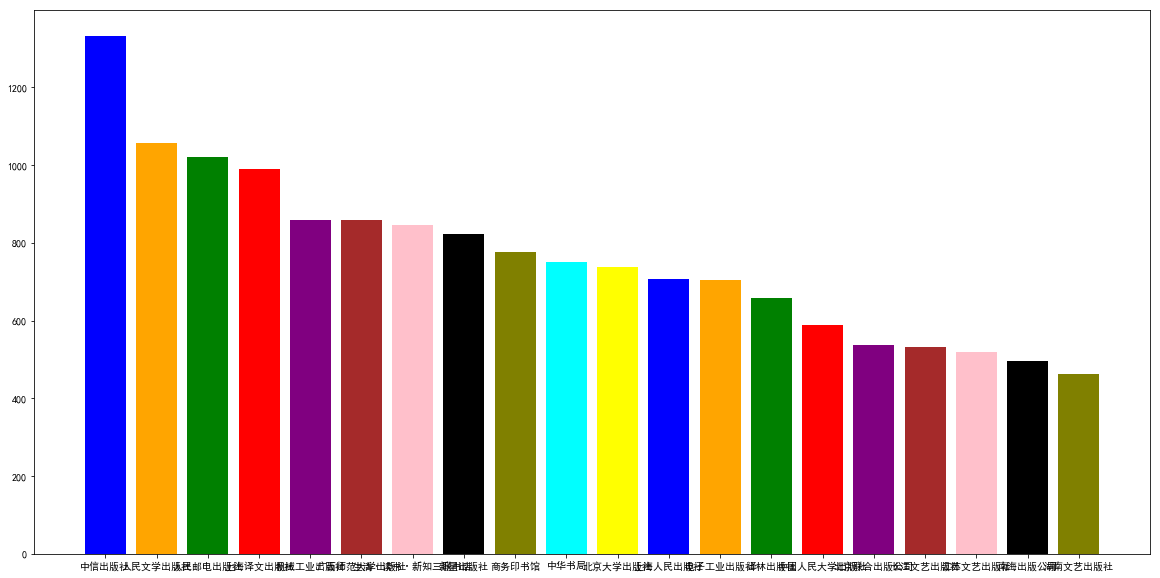

In [73]:
from pylab import *
plt.figure(figsize=(20,10))
plt.xticks(arange(len(df5.index)),df5.index)
plt.bar(arange(len(df5.index)),df5.values,color=['blue','orange','green','red','purple','brown','pink','black','olive','cyan','yellow'])
plt.show()

In [75]:
df6 = df.groupby(['出版社'])['评分'].mean().sort_values(ascending=False)[:20]

In [76]:
df6

出版社
北京出版社出版集团,北京十月文艺出版社                                       10.00
浙江音像                                                      10.00
安徽少儿                                                      10.00
台湾民生报,作家出版社联合出版                                           10.00
聯經出版事業有限公司                                                10.00
Liberty Fund Inc.                                         10.00
PBI Publications                                           9.90
心灵工坊                                                       9.90
臺北故宮博物院                                                    9.90
上海翻译出版公司                                                   9.90
McGraw-Hill Medical                                        9.90
Race Point Publishing                                      9.90
Urania Verlag                                              9.90
Springer-Verlag Berlin and Heidelberg GmbH &amp; Co. K     9.90
Library of America                                         9.85
TASCHEN GmbH                        

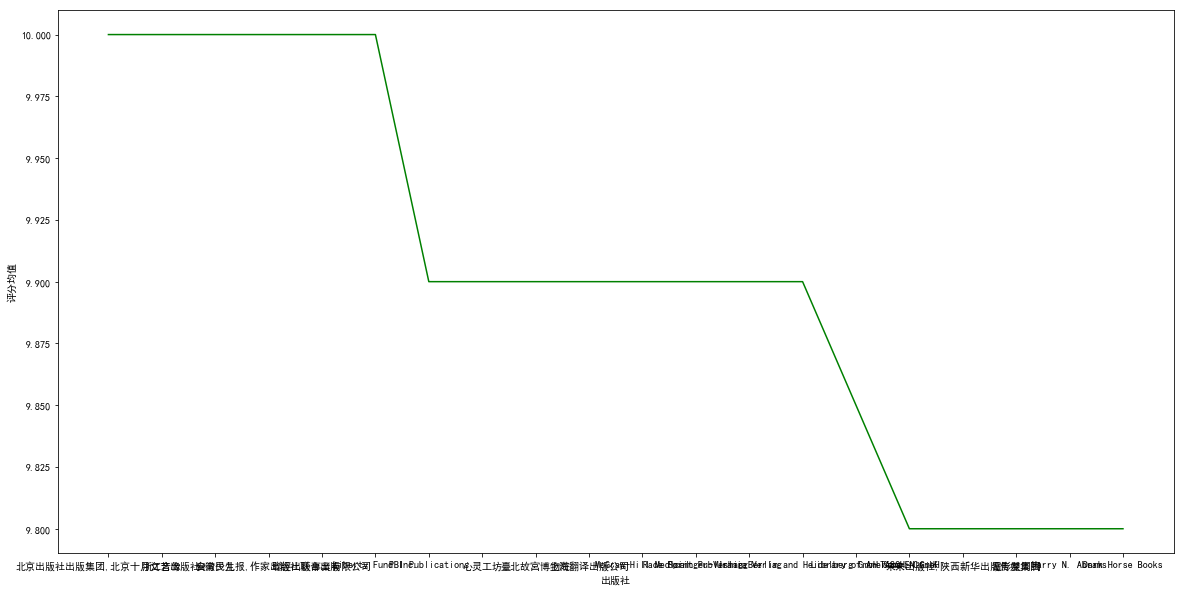

In [77]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(df6.index)),df6.index)
plt.plot(range(len(df6.index)),df6.values,color='green')
plt.xlabel('出版社')
plt.ylabel('评分均值')
plt.show()

In [79]:
df7 = df.groupby(['作者'])['书名'].count().sort_values(ascending=False)[1:20]
df7

作者
亦舒          391
鲁迅          178
郭敬明         111
村上春树        103
王小波         101
古龙          100
东野圭吾        100
斯蒂芬·茨威格      97
阿加莎·克里斯蒂     96
幾米           75
威廉·莎士比亚      73
张爱玲          73
沧月           73
郑渊洁          60
余华           53
金庸           51
张小娴          49
南怀瑾          48
汪曾祺          47
Name: 书名, dtype: int64

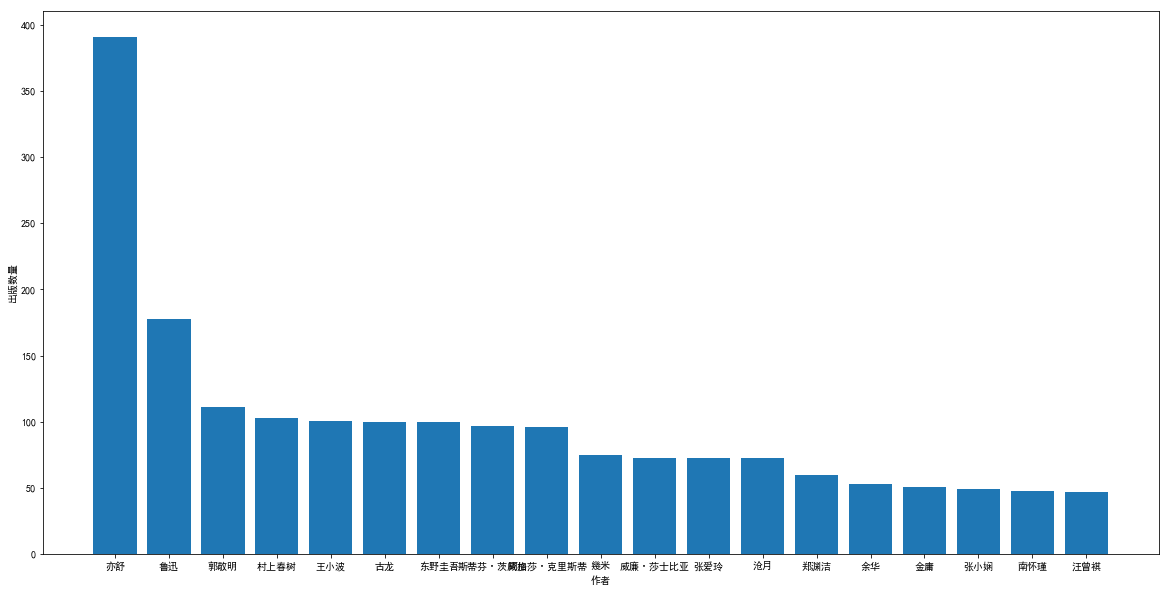

In [82]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(df7.index)),df7.index)
plt.bar(range(len(df7.index)),df7.values)
plt.xlabel('作者')
plt.ylabel('出版数量')
plt.show()

In [83]:
import seaborn as sns

In [85]:
df8 = df[['评分','评论数量']]
df8 

,评分,评论数量
0,7.5,107
1,7.4,2377
2,8.4,42
4,7.7,44
5,7.8,71
6,9.1,178
7,8.6,4448
8,9.0,61
9,8.2,125
10,6.6,63


In [86]:
corr = df8.corr()

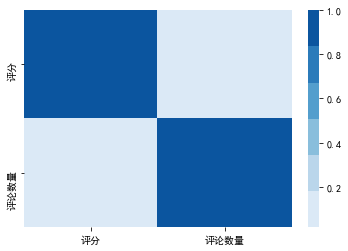

In [87]:
sns.heatmap(corr,cmap=sns.color_palette('Blues'))
plt.show()

In [88]:
corr

,评分,评论数量
评分,1.000000,0.019366
评论数量,0.019366,1.000000


In [93]:
df9 = df[['清洗后价格','评分']]
df9 

,清洗后价格,评分
0,35.0,7.5
1,18.0,7.4
2,20.0,8.4
4,98.0,7.7
5,18.0,7.8
6,8.5,9.1
7,19.0,8.6
8,41.0,9.0
9,39.0,8.2
10,24.0,6.6


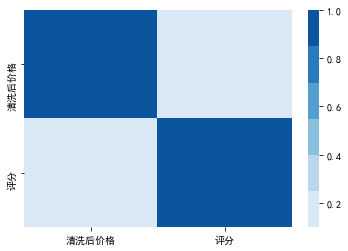

In [94]:
corr = df9.corr()
sns.heatmap(corr,cmap=sns.color_palette('Blues'))
plt.show()

In [95]:
corr 

,清洗后价格,评分
清洗后价格,1.000000,0.098908
评分,0.098908,1.000000
